In [2]:
import numpy as np
import pandas as pd, re, requests
from itertools import combinations
from scipy.sparse import dok_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm.auto import tqdm
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib.colors import ListedColormap
from matplotlib import cm

/Users/sofsen/miniconda3/envs/my_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
fraction_jc = pd.read_csv('/Users/sofsen/Desktop/SMILES 2025/Revealing-interconnections-between-diseases/statistic/matrix/new_cat_co_matrix_fraction.csv')
fraction_jc.head()

,Unnamed: 0,K76,R18,K74,B19,J44,F31,F43,Z87,D69,...,V45,V16,W99,P11,B56,W85,P07,A27,Y64,Y21
0,K76,1.000000,0.172755,0.196821,0.081464,0.051872,0.025966,0.036411,0.075218,0.145118,...,0.0,0.0,0.0,0.0,0.000091,0.0,0.0,0.0,0.0,0.0
1,R18,0.172755,1.000000,0.228834,0.073075,0.030371,0.012939,0.021988,0.041099,0.094812,...,0.0,0.0,0.0,0.0,0.000174,0.0,0.0,0.0,0.0,0.0
2,K74,0.196821,0.228834,1.000000,0.174193,0.036705,0.021668,0.026404,0.039427,0.102222,...,0.0,0.0,0.0,0.0,0.000201,0.0,0.0,0.0,0.0,0.0
3,B19,0.081464,0.073075,0.174193,1.000000,0.034596,0.059353,0.058496,0.033113,0.065722,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,J44,0.051872,0.030371,0.036705,0.034596,1.000000,0.037669,0.035458,0.159792,0.087117,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
fraction_jc = pd.read_csv(
    '/Users/sofsen/Desktop/SMILES 2025/Revealing-interconnections-between-diseases/statistic/matrix/new_cat_co_matrix_fraction.csv',
    index_col=0
)

sorted_categories = sorted(fraction_jc.index.tolist())

fraction_jc_sorted = fraction_jc.loc[sorted_categories, sorted_categories]
fraction_jc_sorted.head()


,A01,A02,A03,A04,A05,A06,A07,A08,A09,A15,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
A01,1.00,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A02,0.04,1.000000,0.000000,0.003468,0.000000,0.000000,0.000000,0.004264,0.001967,0.004237,...,0.001400,0.000839,0.001497,0.000985,0.002694,0.000769,0.000998,0.001603,0.000882,0.000400
A03,0.00,0.000000,1.000000,0.000781,0.000000,0.000000,0.013333,0.000336,0.002144,0.000000,...,0.000078,0.000140,0.000215,0.000000,0.000000,0.000000,0.000143,0.000233,0.000000,0.000101
A04,0.00,0.003468,0.000781,1.000000,0.001939,0.000196,0.001365,0.046218,0.013187,0.002501,...,0.050374,0.043253,0.048012,0.065925,0.057728,0.039182,0.037641,0.033617,0.041908,0.063352
A05,0.00,0.000000,0.000000,0.001939,1.000000,0.000000,0.000000,0.006998,0.004103,0.000000,...,0.000702,0.000981,0.001181,0.000992,0.002388,0.000513,0.000929,0.000924,0.000568,0.000703


In [6]:
fraction_jc_sorted.to_csv('/Users/sofsen/Desktop/SMILES 2025/Revealing-interconnections-between-diseases/statistic/matrix/new_cat_jacc_sorted.csv')

In [7]:
bert_df = pd.read_csv('/Users/sofsen/Desktop/SMILES 2025/Revealing-interconnections-between-diseases/medbert/similarity_scores.csv')
bert_df.head()

,Unnamed: 0,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,A01,1.000001,0.859075,0.666252,0.858970,0.823209,0.738721,0.829739,0.882886,0.872616,...,0.805431,0.770934,0.720138,0.700661,0.752214,0.779754,0.763720,0.739030,0.708702,0.748625
1,A02,0.859075,1.000000,0.778066,0.973230,0.887739,0.864728,0.942118,0.934124,0.913692,...,0.834017,0.822645,0.804432,0.820511,0.804258,0.787913,0.850432,0.855871,0.834248,0.813535
2,A03,0.666252,0.778066,1.000000,0.791396,0.790527,0.919051,0.805557,0.738944,0.729135,...,0.776086,0.733131,0.760433,0.809154,0.733271,0.657126,0.758232,0.780746,0.834849,0.778442
3,A04,0.858970,0.973230,0.791396,1.000000,0.898024,0.869329,0.958388,0.949403,0.909557,...,0.844010,0.828375,0.841727,0.840908,0.817086,0.789605,0.861209,0.881406,0.863679,0.832695
4,A05,0.823209,0.887739,0.790527,0.898024,0.999999,0.848472,0.881998,0.885303,0.877407,...,0.887322,0.865898,0.805541,0.821158,0.816779,0.779478,0.833239,0.858138,0.860579,0.881463


In [ ]:
medbert_df = pd.read_csv('/Users/sofsen/Desktop/SMILES 2025/Revealing-interconnections-between-diseases/statistic/matrix/medbert_matrix.csv', index_col=0)
mlm = pd.read_csv('/Users/sofsen/Desktop/SMILES 2025/Revealing-interconnections-between-diseases/statistic/matrix/mlm_results_final.csv',index_col=0)


попытка найти пары категорий, которые:
часто встречаются вместе (высокий Jaccard) + выглядят непохожими с точки зрения текста (низкая cois_sim)

In [8]:
fraction_jc_sorted.index

Index(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A15',
       ...
       'Z90', 'Z91', 'Z92', 'Z93', 'Z94', 'Z95', 'Z96', 'Z97', 'Z98', 'Z99'],
      dtype='object', length=1757)

In [9]:
bert_df.columns

Index(['Unnamed: 0', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08',
       'A09',
       ...
       'Z90', 'Z91', 'Z92', 'Z93', 'Z94', 'Z95', 'Z96', 'Z97', 'Z98', 'Z99'],
      dtype='object', length=1697)

In [10]:
fraction_jc_sorted.columns

Index(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A15',
       ...
       'Z90', 'Z91', 'Z92', 'Z93', 'Z94', 'Z95', 'Z96', 'Z97', 'Z98', 'Z99'],
      dtype='object', length=1757)

In [12]:
common_codes = sorted(set(fraction_jc_sorted.columns) & set(bert_df.columns))
len(common_codes)

1696

In [ ]:
bert_common = bert_df.loc[:, common_codes].copy()  
bert_common.index = bert_df['Unnamed: 0']           
bert_common = bert_common.loc[common_codes, common_codes]  #

fraction_common = fraction_jc_sorted.loc[common_codes, common_codes]

assert all(fraction_common.columns == bert_common.columns)
assert all(fraction_common.index == bert_common.index)

In [14]:
combined_score = fraction_common * (1 - bert_common)

combined_score.to_csv('matrix/combined_score_jaccard_cosine.csv')
combined_score.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A15,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
A01,-6.000000e-07,5.636980e-03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A02,5.636980e-03,3.600000e-07,0.000000e+00,0.000093,0.000000e+00,0.000000,0.000000,0.000281,0.000170,0.000754,...,0.000232,0.000149,0.000293,0.000177,0.000527,0.000163,0.000149,0.000231,0.000146,0.000075
A03,0.000000e+00,0.000000e+00,-2.000000e-07,0.000163,0.000000e+00,0.000000,0.002593,0.000088,0.000581,0.000000,...,0.000018,0.000037,0.000052,0.000000,0.000000,0.000000,0.000035,0.000051,0.000000,0.000022
A04,0.000000e+00,9.284473e-05,1.629719e-04,0.000000,1.977046e-04,0.000026,0.000057,0.002338,0.001193,0.000472,...,0.007858,0.007423,0.007599,0.010488,0.010559,0.008244,0.005224,0.003987,0.005713,0.010599
A05,0.000000e+00,0.000000e+00,0.000000e+00,0.000198,6.000000e-07,0.000000,0.000000,0.000803,0.000503,0.000000,...,0.000079,0.000132,0.000230,0.000177,0.000438,0.000113,0.000155,0.000131,0.000079,0.000083


In [15]:
all_pairs = combined_score.where(~np.eye(len(combined_score), dtype=bool)).stack().reset_index()
all_pairs.columns = ['code_i', 'code_j', 'score']

all_pairs = all_pairs[all_pairs['code_i'] < all_pairs['code_j']]

all_pairs['jaccard'] = all_pairs.apply(lambda row: fraction_common.loc[row['code_i'], row['code_j']], axis=1)
all_pairs['cosine'] = all_pairs.apply(lambda row: bert_common.loc[row['code_i'], row['code_j']], axis=1)

all_pairs = all_pairs.sort_values('score', ascending=False)
all_pairs.to_csv('matrix/combined_score_all_pairs.csv', index=False)
all_pairs.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1437360 entries, 2355912 to 14
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   code_i   1437360 non-null  object 
 1   code_j   1437360 non-null  object 
 2   score    1437360 non-null  float64
 3   jaccard  1437360 non-null  float64
 4   cosine   1437360 non-null  float64
dtypes: float64(3), object(2)
memory usage: 65.8+ MB


In [16]:
all_pairs['jaccard'].describe()

count    1.437360e+06
mean     2.386013e-03
std      8.586107e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.361470e-03
max      7.491553e-01
Name: jaccard, dtype: float64

In [17]:
all_pairs.head()

,code_i,code_j,score,jaccard,cosine
2355912,T67,X30,0.130045,0.673469,0.806903
1766139,O70,Z37,0.109509,0.503178,0.782365
1796649,O99,Z37,0.104449,0.514800,0.797108
1031169,I48,I50,0.095363,0.337058,0.717072
1715280,O25,Z22,0.092665,0.406603,0.772100


In [18]:
jaccard_threshold = all_pairs['jaccard'].quantile(0.75) 
cosine_threshold = all_pairs['cosine'].quantile(0.25)   

filtered_pairs = all_pairs[
    (all_pairs['jaccard'] > jaccard_threshold) &
    (all_pairs['cosine'] < cosine_threshold)
]
filtered_pairs.head(20)

,code_i,code_j,score,jaccard,cosine
1031169,I48,I50,0.095363,0.337058,0.717072
539857,E20,M11,0.083831,0.333333,0.748507
1285979,K74,R18,0.077152,0.228834,0.662845
1031488,I48,N17,0.063315,0.230248,0.725015
228352,B95,R78,0.061480,0.219205,0.719531
2216874,S68,W31,0.059462,0.234300,0.746212
2137282,S21,X99,0.056901,0.231237,0.753928
1031489,I48,N18,0.055099,0.216833,0.745894
1032242,I48,Z87,0.052695,0.194975,0.729736
534532,E11,I48,0.051276,0.174478,0.706117


In [19]:
filtered_pairs.to_csv('/Users/sofsen/Desktop/SMILES 2025/Revealing-interconnections-between-diseases/statistic/matrix/combined_score_all_pairs_filtered.csv')

In [20]:
from IPython.display import display
styled = filtered_pairs.sort_values("score", ascending=False).head(20).style.background_gradient(subset=['jaccard', 'cosine', 'score'], cmap='coolwarm')
display(styled)


,code_i,code_j,score,jaccard,cosine
1031169,I48,I50,0.095363,0.337058,0.717072
539857,E20,M11,0.083831,0.333333,0.748507
1285979,K74,R18,0.077152,0.228834,0.662845
1031488,I48,N17,0.063315,0.230248,0.725015
228352,B95,R78,0.061480,0.219205,0.719531
2216874,S68,W31,0.059462,0.234300,0.746212
2137282,S21,X99,0.056901,0.231237,0.753928
1031489,I48,N18,0.055099,0.216833,0.745894
1032242,I48,Z87,0.052695,0.194975,0.729736
534532,E11,I48,0.051276,0.174478,0.706117


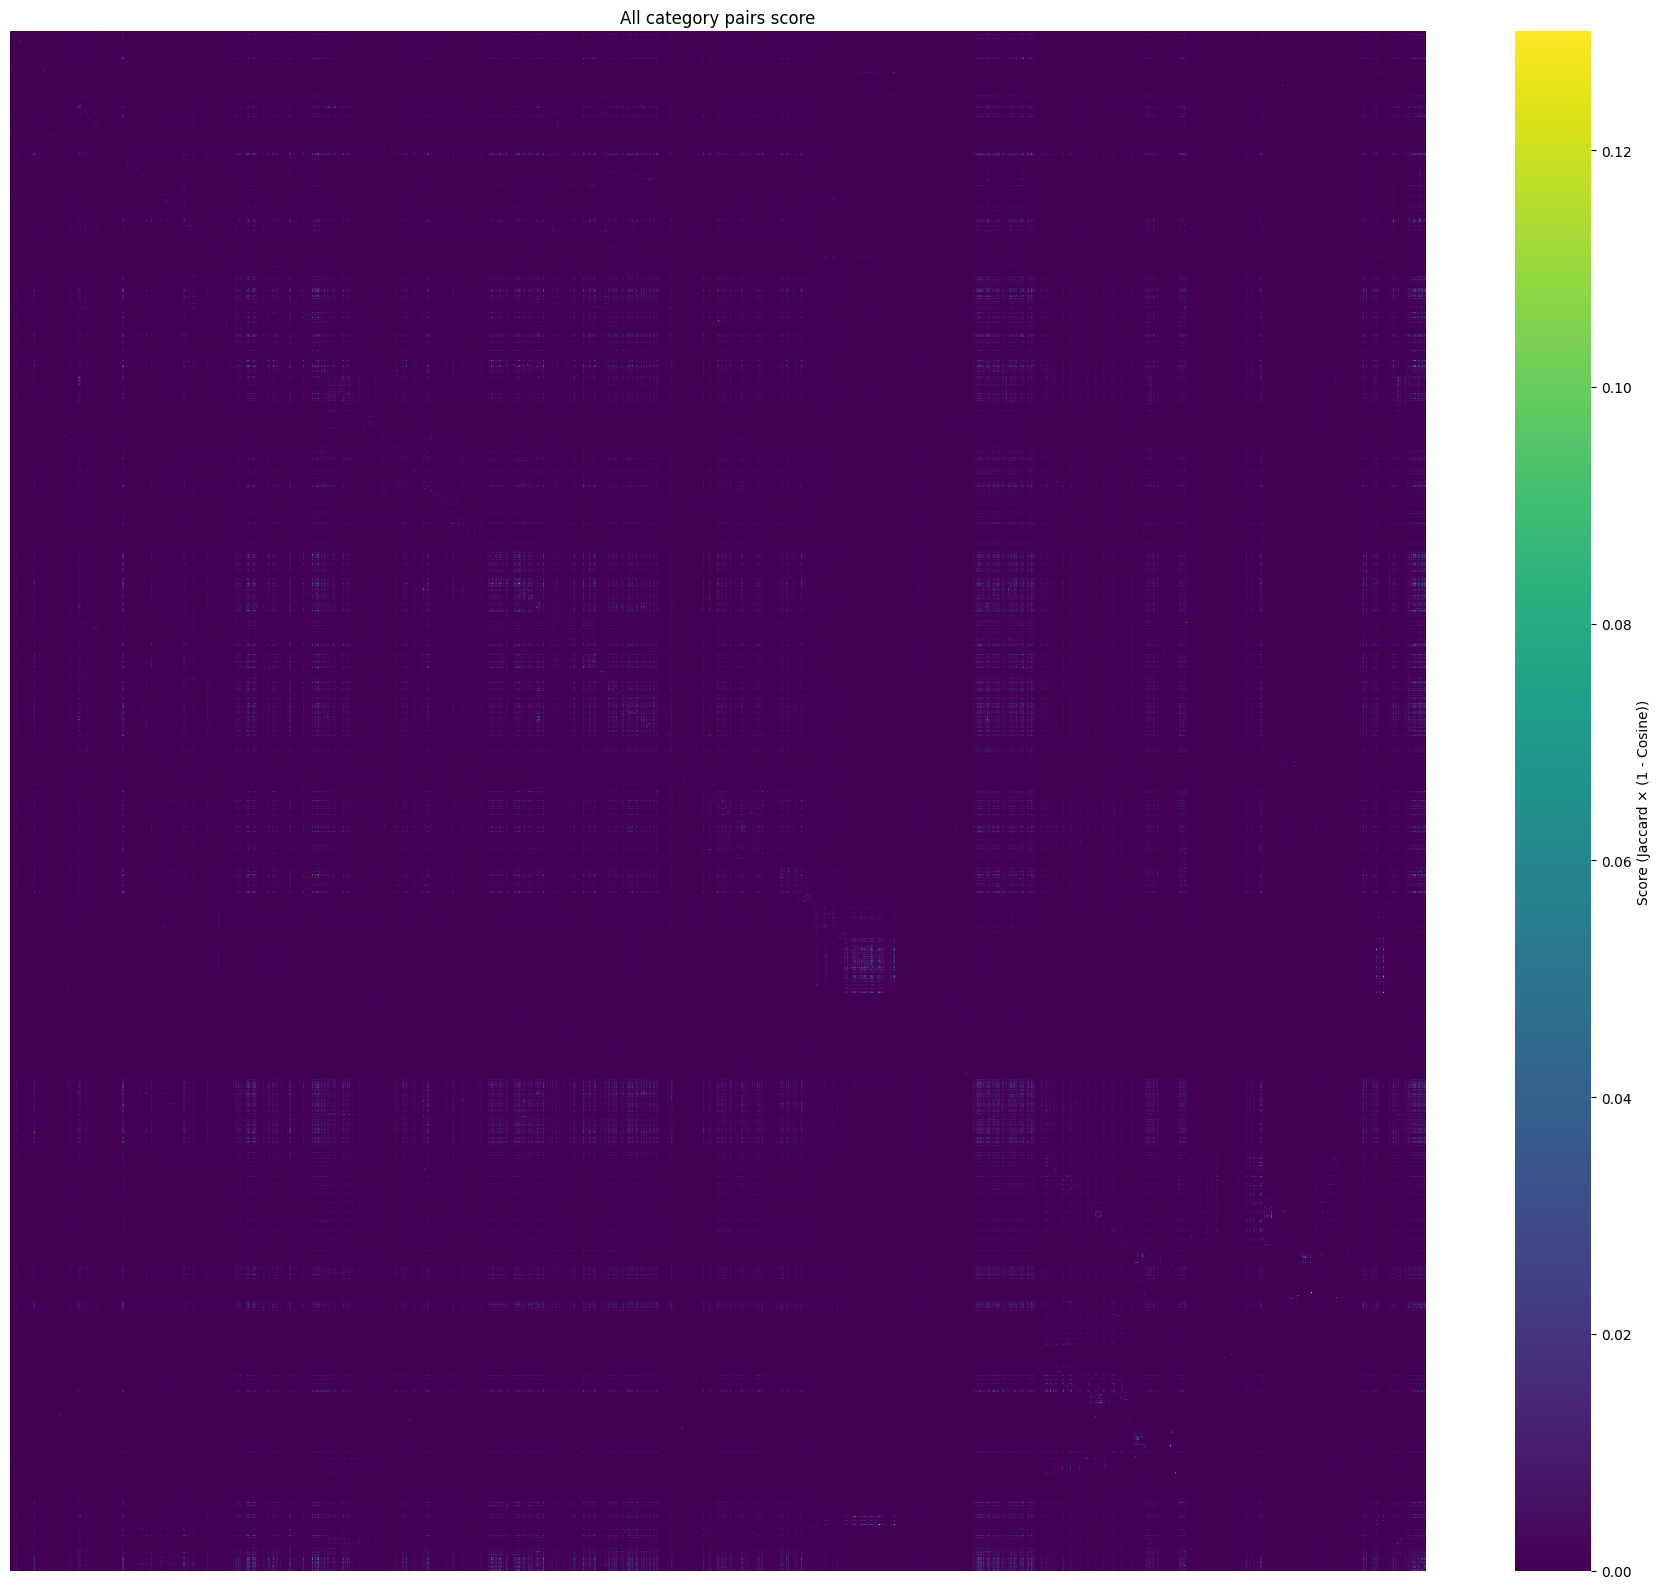

In [25]:
# долго
all_codes = sorted(set(all_pairs['code_i']).union(set(all_pairs['code_j'])))

heatmap_matrix = pd.DataFrame(index=all_codes, columns=all_codes, data=np.nan)

for _, row in all_pairs.iterrows():
    i, j, score = row['code_i'], row['code_j'], row['score']
    heatmap_matrix.loc[i, j] = score
    heatmap_matrix.loc[j, i] = score

heatmap_matrix.fillna(0, inplace=True)

plt.figure(figsize=(18, 16))
sns.heatmap(
    heatmap_matrix,
    cmap="viridis",
    cbar_kws={"label": "Score (Jaccard × (1 - Cosine))"},
    xticklabels=False,
    yticklabels=False
)
plt.title("All category pairs score")
plt.savefig(f'pics/category_pairs_score.jpg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


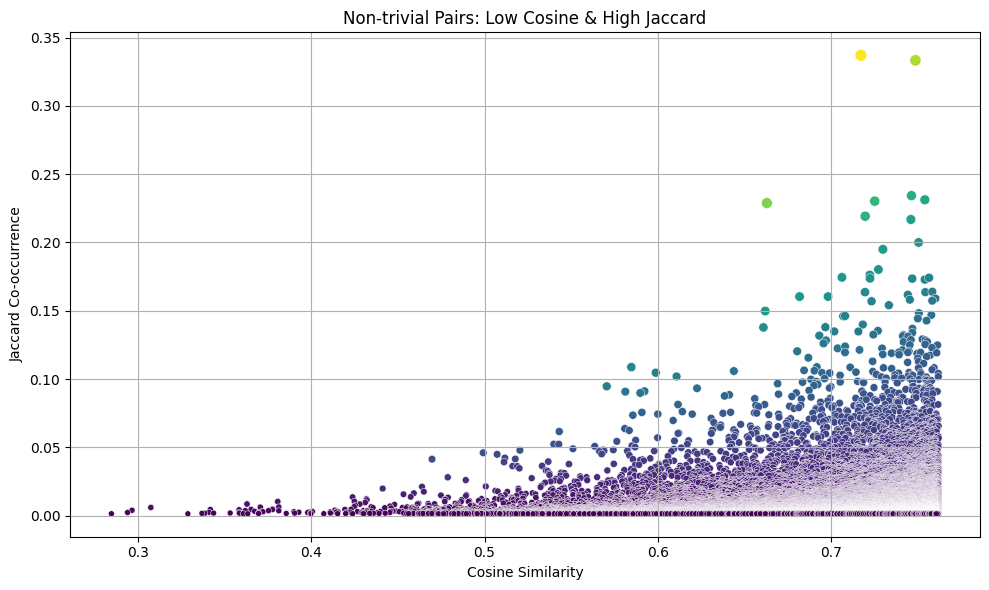

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_pairs,
    x="cosine",
    y="jaccard",
    hue="score",
    palette="viridis",
    size="score",
    legend=False
)
plt.xlabel("Cosine Similarity")
plt.ylabel("Jaccard Co-occurrence")
plt.title("Non-trivial Pairs: Low Cosine & High Jaccard")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 6))

# sns.histplot(all_pairs['jaccard'], bins=100, color='skyblue', kde=True, label='Jaccard')

# sns.histplot(all_pairs['cosine'], bins=100, color='orange', kde=True, label='Cosine Similarity')

# plt.axvline(all_pairs['jaccard'].quantile(0.75), color='blue', linestyle='--', label='Jaccard 75%')
# plt.axvline(all_pairs['cosine'].quantile(0.25), color='red', linestyle='--', label='Cosine 25%')

# plt.title("Распределения Jaccard и Cosine Similarity")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.legend()
# plt.tight_layout()
# plt.show()


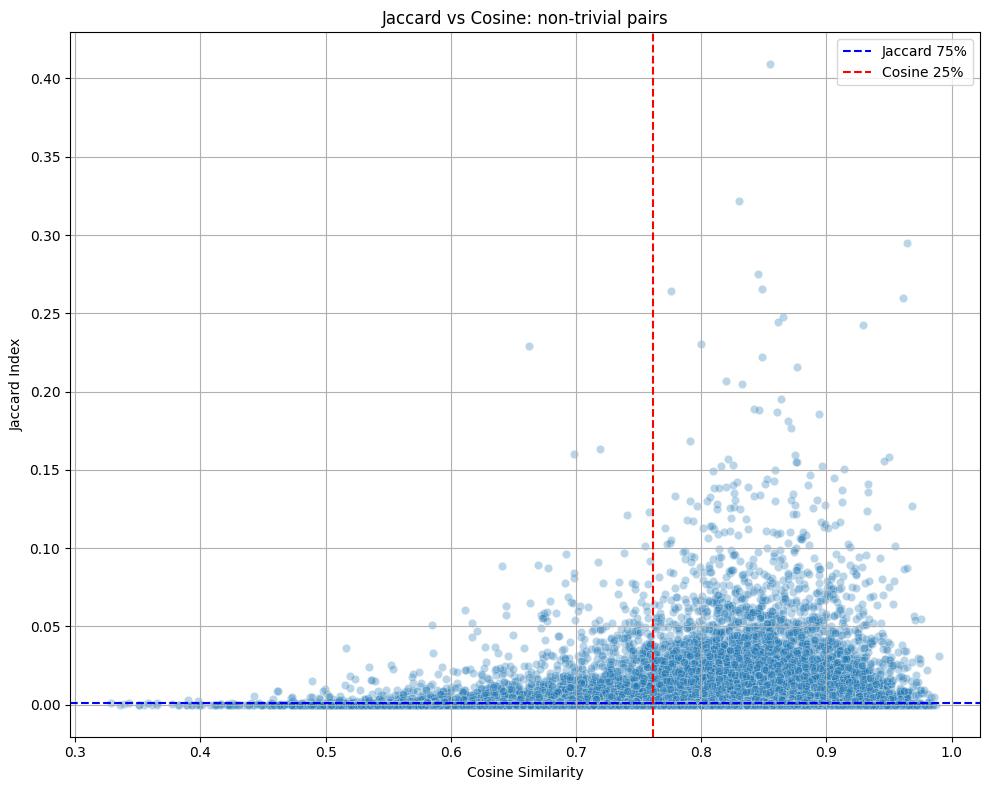

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=all_pairs.sample(100_000),  # если данных много, можно сделать .sample()
    x='cosine',
    y='jaccard',
    alpha=0.3
)

jaccard_thresh = all_pairs['jaccard'].quantile(0.75)
cosine_thresh = all_pairs['cosine'].quantile(0.25)

plt.axhline(jaccard_thresh, color='blue', linestyle='--', label='Jaccard 75%')
plt.axvline(cosine_thresh, color='red', linestyle='--', label='Cosine 25%')

plt.xlabel('Cosine Similarity')
plt.ylabel('Jaccard Index')
plt.title('Jaccard vs Cosine: non-trivial pairs')
plt.legend()
plt.grid(True)
plt.savefig(f'pics/jaccard_cosine_bert.jpg', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Правый верхний угол: высокие cosine + высокие jaccard - вероятно, тривиальные связи (схожие и по описанию, и по пациентам).

Левый верхний угол: низкие cosine + высокие jaccard - интересные, нетривиальные связи — встречаются часто, но не похожи по описанию

Остальные либо редкие (низкий jaccard), либо схожие по смыслу, но мало встречаются.

In [ ]:
filtered_pairs = all_pairs[
    (all_pairs['jaccard'] > jaccard_thresh) &
    (all_pairs['cosine'] < cosine_thresh)
].copy()

filtered_pairs = filtered_pairs.sort_values(by='jaccard', ascending=False)
filtered_pairs.head(20)

Мне сделать:
1. посчитать такие таблички с трешхолдами для всех методов, дальше посмотреть отношение числа точек в правом верхнем угле ко всем точкам. Так сравнить попарно все метода